# Capstone Project - The Battle of the Neighborhoods (Week 5)
### Applied Data Science Capstone by IBM/Coursera
by Haoyang(Harrison) Li

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Code](#code)
* [Analysis and Result](#result)
* [Results and Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Some people call themselves "foodies" maybe simply because it is a trendy word to use when posting pictures of food on social networks. To be frank, I never put the "foodie" label on myself, but I am the type of person would travel for good restaurants. In my eyes, cities and countries are made of not only sightseeing spots but also fantastic food---ethnic, casual, local fast food, fine dining, you name it.

It would be interesting and informative for people like myself to find a way to visualize and clustering cities and countries based on categories of restaurants in a holistic way. Going forward we can simply refer at the findings of this little project to plan next travel.

## Data <a name="data"></a>

Originally, this project will be done using just the Foursquare API data. However, I came to realize it is impossible to get the complete list of all food venues of cities or countries by this approach because the free account has limit of 500 result returned per user every hour. Thus, I found a Foursquare data from this publication:

>Dingqi Yang, Daqing Zhang, Bingqing Qu. Participatory Cultural Mapping Based on Collective Behavior Data in Location Based Social Networks. ACM Trans. on Intelligent Systems and Technology (TIST), 2015

This dataset includes about 18 months from April 2012 to September 2013 of check-in data collected from Foursquare by the authors. There are 33,278,683 check-ins by 266,909 users on 3,680,126 venues in 415 cities of 77 countries.

This project is using the venue portion of data, which has the following columns:
1. Venue ID (Foursquare) 
2. Latitude
3. Longitude
4. Venue category name (Foursquare)
5. Country code (ISO 3166-1 alpha-2 two-letter country codes)

Apart from the venue data above, the project also leverages the data from this webpage, which has 
- the list of countries, 
- country code, 
- and their coordinates. 

This data helps with mapping the two-letter country code to full name in English for readability.

# Methodology <a name="methodology"></a>

For exploratory data analyses, the distribution of countries as well as the distribution of food venue categories are gathered and analyzed. I noticed that skewness of both the distribution and planned to normalize the data before modeling. 

For machine learning, I used K means clustering for grouping nations based on their food venue categories in an unsupervised manner. I choose this method because it is believed to be very fast and easy to implement.

# Code <a name="code"></a>

## Importing Libraries Needed

In [281]:
# pre-processing
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
from sklearn import preprocessing # for normalization

# modelling
from sklearn.cluster import KMeans

# visulization
import folium
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import Image

# other
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

## Loading the Venue Data into a dataframe

In [278]:
additional_food_list = [
    'BBQ Joint',
    'Bagel Shop',
    'BBakery',
    'BBelgian Restaurant',
    'Bistro',
    'Breakfast Spot',
    'Bubble Tea Shop',
    'Buffet',
    'Burger Joint',
    'Café',
    'Coffee Shop',
    'Diner',
    'Donut Shop',
    'Creperie',
    'Deli / Bodega',
    'Dessert Shop',
    'Fish & Chips Shop',
    'Fried Chicken Joint',
    'Hot Dog Joint',
    'Juice Bar',
    'Pizza Place',
    'Poutine Place',
    'Salad Place',
    'Sandwich Place',
    'Snack Place',
    'Soup Place',
    'Southern / Soul Food Restaurant',
    'Steakhouse',
    'Tea Room',
    'Theme Restaurant',
    'Wings Joint'
]

In [113]:
df = pd.read_csv('dataset_TIST2015_POIs.txt',sep='\t',header=None)
df.columns = ['venue_id','latitude','longitude','venue_category','country_code']
df.drop_duplicates(['venue_id'],inplace=True)

df = df[(df.venue_category.str.contains('Restaurant'))
        | (df.venue_category.isin(additional_food_list))
       ]

df = df[(df.venue_category != 'Restaurant') 
        & (df.venue_category != 'Fast Food Restaurant')
       ]
df.head()

,venue_id,latitude,longitude,venue_category,country_code
2,3fd66200f964a52000ea1ee3,40.732456,-74.003755,Indian Restaurant,US
3,3fd66200f964a52000ec1ee3,42.345907,-71.087001,Indian Restaurant,US
4,3fd66200f964a52000ee1ee3,39.933178,-75.159262,Sandwich Place,US
8,3fd66200f964a52001ed1ee3,37.779837,-122.494471,Seafood Restaurant,US
15,3fd66200f964a52003e71ee3,40.739685,-74.006020,French Restaurant,US


## Exploratory data analysis

There food venues are located across 77 different countries in our dataset. With the top 3 nations been US, India, Japan, Malaysia, and Brazil, we are dealling with a rather skewing distribution.

In [114]:
df.country_code.value_counts().describe()

count       77.000000
mean      7638.467532
std      16655.577778
min        202.000000
25%        503.000000
50%       1133.000000
75%       5994.000000
max      97923.000000
Name: country_code, dtype: float64

In [115]:
df.country_code.value_counts().index[:15]

Index(['US', 'ID', 'JP', 'MY', 'BR', 'TR', 'TH', 'MX', 'KR', 'RU', 'PH', 'CN',
       'CA', 'GB', 'ES'],
      dtype='object')

In [116]:
df.country_code.value_counts()

US    97923
ID    67496
JP    54203
MY    52992
BR    39475
TR    32072
TH    30354
MX    26275
KR    19738
RU    13940
PH    12517
CN    10328
CA     9248
GB     8773
ES     8480
CL     7748
AU     7417
SG     6576
IN     6025
IT     5994
DE     5498
FR     4186
CO     3987
NL     3837
BE     3738
PE     3570
AR     3047
SA     3007
KW     3006
GR     2418
UA     2200
CR     2008
AE     1944
VN     1488
PY     1394
PT     1389
ZA     1334
EC     1180
PR     1133
SE     1098
EG     1032
PA      856
HU      838
IL      773
VE      770
LB      753
AT      695
CZ      694
SV      690
NZ      690
DO      683
CY      666
FI      628
QA      588
IE      565
KE      565
PL      517
BH      503
LK      491
RO      486
JO      480
LV      459
CH      440
TN      396
BG      389
DK      370
KZ      356
BY      343
GH      325
MA      323
TT      308
OM      290
MQ      254
UY      249
AZ      243
JM      216
EE      202
Name: country_code, dtype: int64

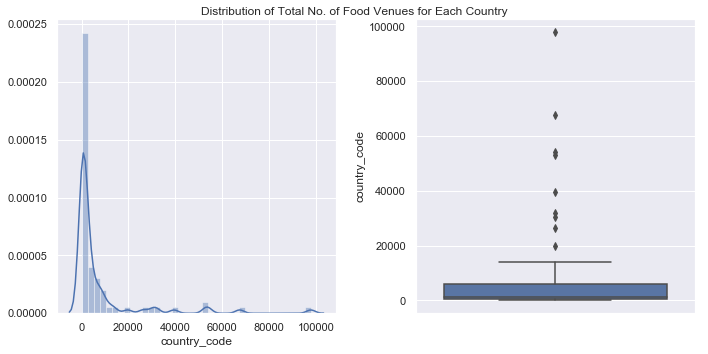

In [160]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
x = df.country_code.value_counts()
sns.distplot(x,ax=axes[0])
sns.boxplot(x,ax=axes[1],orient='v')
f.suptitle('Distribution of Total No. of Food Venues of Each Country', fontsize=12)
plt.tight_layout()
plt.show()

There are 72 different categories of food venues with Coffee Shop, Asian Restaurant, Chinese Restaurant, Japanese Restaurant, and Pizza Place been the top 5. Just like the total number of venues of each country, the distribution for each food category is also not normally distributed. 

In [117]:
df.venue_category.value_counts().describe()

count       72.000000
mean      8168.916667
std       9806.110006
min        143.000000
25%       1301.250000
50%       3275.000000
75%      11929.250000
max      42008.000000
Name: venue_category, dtype: float64

In [118]:
df.venue_category.value_counts()

Coffee Shop                        42008
Asian Restaurant                   36657
Chinese Restaurant                 35489
Japanese Restaurant                33892
Pizza Place                        28964
Italian Restaurant                 24940
Diner                              20616
Burger Joint                       20384
American Restaurant                17278
Mexican Restaurant                 16931
Indonesian Restaurant              16829
Seafood Restaurant                 16730
BBQ Joint                          16642
Sandwich Place                     16280
Dessert Shop                       15611
Thai Restaurant                    14595
Breakfast Spot                     13330
Sushi Restaurant                   12476
Snack Place                        11747
Steakhouse                         11716
Malaysian Restaurant               11622
Indian Restaurant                  11442
Korean Restaurant                  10592
Turkish Restaurant                 10581
Fried Chicken Jo

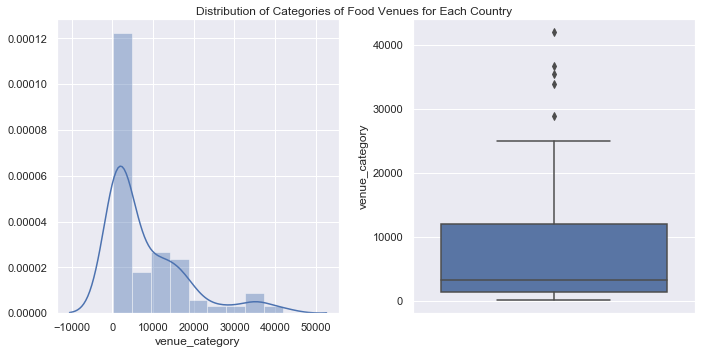

In [162]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
x = df.venue_category.value_counts()
sns.distplot(x,ax=axes[0])
sns.boxplot(x,ax=axes[1],orient='v')
f.suptitle('Distribution of Categories of Food Venues for Each Country', fontsize=12)
plt.tight_layout()
plt.show()

## Encoding the food venues data for frequncy calculation and modelling

In [122]:
def move_last_col_to_frist(df_in):
    cols = df_in.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_in = df_in[cols]
    
    return df_in

In [164]:
df_encoded = pd.get_dummies(df[['venue_category']], prefix="", prefix_sep="")

df_encoded['country_code'] = df['country_code'] 

# move country_code column to the first column
df_encoded = move_last_col_to_frist(df_encoded)
df_encoded.sample(5)

,country_code,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Brazilian Restaurant,Breakfast Spot,Burger Joint,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,Fish & Chips Shop,French Restaurant,Fried Chicken Joint,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Malaysian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Peruvian Restaurant,Pizza Place,Portuguese Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
223061,US,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102597,AU,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
250533,SG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
344610,KR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
633,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Getting the sum of food venues count for each country

In [165]:
df_grouped_sum = df_encoded.groupby('country_code').sum().reset_index()
df_grouped_sum.sample(5)

,country_code,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Brazilian Restaurant,Breakfast Spot,Burger Joint,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,Fish & Chips Shop,French Restaurant,Fried Chicken Joint,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Malaysian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Peruvian Restaurant,Pizza Place,Portuguese Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,AE,5.0,9.0,99.0,7.0,4.0,114.0,4.0,30.0,3.0,1.0,27.0,96.0,0.0,3.0,80.0,219.0,3.0,10.0,62.0,2.0,24.0,17.0,0.0,4.0,2.0,21.0,13.0,3.0,41.0,27.0,0.0,0.0,2.0,1.0,176.0,2.0,106.0,25.0,14.0,10.0,5.0,1.0,31.0,23.0,260.0,1.0,0.0,4.0,1.0,0.0,0.0,84.0,4.0,4.0,53.0,0.0,49.0,19.0,0.0,1.0,3.0,3.0,28.0,26.0,1.0,0.0,24.0,30.0,14.0,8.0,1.0,0.0
71,UA,5.0,4.0,24.0,1.0,3.0,49.0,0.0,64.0,6.0,0.0,14.0,30.0,0.0,1.0,31.0,315.0,10.0,34.0,46.0,3.0,141.0,8.0,22.0,210.0,2.0,6.0,0.0,1.0,37.0,27.0,16.0,1.0,6.0,18.0,10.0,0.0,176.0,42.0,27.0,2.0,2.0,0.0,17.0,18.0,64.0,2.0,0.0,3.0,0.0,0.0,0.0,294.0,0.0,2.0,34.0,2.0,26.0,56.0,6.0,1.0,2.0,4.0,30.0,166.0,1.0,1.0,34.0,8.0,15.0,16.0,4.0,0.0
6,BG,0.0,1.0,3.0,0.0,0.0,5.0,0.0,19.0,2.0,0.0,4.0,11.0,0.0,0.0,13.0,22.0,1.0,1.0,22.0,0.0,23.0,6.0,0.0,53.0,0.0,6.0,0.0,0.0,4.0,9.0,1.0,0.0,8.0,0.0,0.0,0.0,25.0,1.0,2.0,0.0,0.0,0.0,4.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,84.0,0.0,1.0,16.0,0.0,6.0,2.0,5.0,0.0,0.0,0.0,2.0,6.0,0.0,2.0,3.0,1.0,7.0,1.0,0.0,0.0
1,AR,0.0,2.0,37.0,4.0,708.0,31.0,0.0,136.0,11.0,5.0,146.0,87.0,0.0,2.0,64.0,226.0,5.0,80.0,50.0,1.0,49.0,0.0,1.0,10.0,1.0,11.0,1.0,2.0,36.0,3.0,13.0,3.0,1.0,22.0,10.0,0.0,138.0,36.0,1.0,2.0,23.0,0.0,20.0,45.0,26.0,1.0,1.0,0.0,3.0,3.0,26.0,447.0,0.0,20.0,137.0,3.0,16.0,32.0,0.0,24.0,5.0,28.0,43.0,85.0,2.0,7.0,45.0,5.0,1.0,60.0,1.0,3.0
51,NZ,0.0,0.0,7.0,0.0,1.0,44.0,0.0,4.0,0.0,1.0,4.0,60.0,2.0,1.0,64.0,53.0,0.0,7.0,9.0,1.0,8.0,4.0,1.0,0.0,0.0,1.0,0.0,13.0,8.0,12.0,0.0,0.0,1.0,0.0,38.0,3.0,25.0,41.0,7.0,18.0,2.0,9.0,3.0,16.0,8.0,1.0,2.0,0.0,0.0,0.0,0.0,36.0,9.0,1.0,29.0,0.0,12.0,7.0,0.0,0.0,0.0,2.0,10.0,28.0,0.0,7.0,7.0,28.0,18.0,6.0,11.0,0.0


## Normalize the food venues count to alleviate skewness

In [121]:
mm_scaler = preprocessing.MinMaxScaler()
grouped_sum_minmax = mm_scaler.fit_transform(df_grouped_sum.drop('country_code',axis=1))
grouped_sum_minmax

array([[0.03676471, 0.05232558, 0.0105196 , ..., 0.01296596, 0.00083822,
        0.        ],
       [0.        , 0.01162791, 0.00393157, ..., 0.09724473, 0.00083822,
        0.00300903],
       [0.        , 0.01162791, 0.00074381, ..., 0.0178282 , 0.00335289,
        0.        ],
       ...,
       [0.        , 0.        , 0.00244395, ..., 0.00162075, 0.        ,
        0.00100301],
       [0.00735294, 0.        , 0.00116884, ..., 0.03403566, 0.35456832,
        0.00401204],
       [0.00735294, 0.26162791, 0.00138136, ..., 0.00162075, 0.00167645,
        0.        ]])

In [241]:
df_grouped_normalized = pd.DataFrame(data=grouped_sum_minmax,
                                     columns=df_grouped_sum.drop('country_code',axis=1).columns)
df_grouped_normalized['country_code'] = df_grouped_sum['country_code']
df_grouped_normalized = move_last_col_to_frist(df_grouped_normalized)
df_grouped_normalized.sample(5)

,country_code,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Brazilian Restaurant,Breakfast Spot,Burger Joint,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,Fish & Chips Shop,French Restaurant,Fried Chicken Joint,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Malaysian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Peruvian Restaurant,Pizza Place,Portuguese Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
8,BR,0.272059,0.273256,0.026990,0.389313,0.145480,0.032897,0.178182,0.857437,0.490494,1.000000,0.405556,0.778841,0.023041,0.026882,0.091140,0.086324,0.026895,0.189237,0.737162,0.025362,0.685579,0.036547,0.145648,0.026744,0.080882,0.301676,0.003135,0.276923,0.186957,0.195136,0.131188,1.000000,0.020359,0.922747,0.012068,0.000124,0.302846,0.063089,0.912727,0.006218,0.137931,0.000273,0.123832,0.022034,0.229032,1.000000,0.270270,0.312500,0.027594,0.118182,0.030055,0.492914,0.465812,0.467871,0.176642,0.040650,0.307904,1.000000,0.083204,0.318386,0.031509,0.024024,0.576174,0.372518,0.304348,0.025618,0.336303,0.002852,0.000943,0.479741,0.007544,0.053159
4,AZ,0.000000,0.011628,0.000213,0.007634,0.000000,0.001474,0.003636,0.000000,0.000951,0.000000,0.000926,0.000517,0.000000,0.000000,0.000423,0.001778,0.000000,0.000000,0.002761,0.000000,0.005024,0.000000,0.000000,0.018605,0.000000,0.000000,0.000784,0.002198,0.000725,0.002316,0.002475,0.000000,0.000000,0.000000,0.000402,0.000000,0.003558,0.000268,0.001212,0.000000,0.000000,0.000000,0.004673,0.000139,0.011613,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000870,0.000000,0.000000,0.000000,0.000000,0.001375,0.001689,0.000000,0.000000,0.000000,0.000601,0.000573,0.000779,0.000000,0.000000,0.027840,0.000000,0.003457,0.000000,0.000000,0.001003
59,PY,0.051471,0.040698,0.005525,0.015267,0.024011,0.002764,0.003636,0.026731,0.006654,0.007551,0.040741,0.051474,0.004608,0.007168,0.004797,0.005777,0.000000,0.009849,0.034787,0.000000,0.010638,0.003888,0.001776,0.000000,0.007353,0.022346,0.000000,0.015385,0.005072,0.004632,0.008663,0.068182,0.000000,0.010014,0.000805,0.000000,0.011093,0.001177,0.030303,0.001008,0.056972,0.000091,0.005841,0.002217,0.009032,0.170213,0.000000,0.020833,0.001104,0.027273,0.002732,0.023371,0.000000,0.016064,0.004818,0.000000,0.003780,0.013936,0.000778,0.130045,0.006633,0.002402,0.010882,0.001946,0.000000,0.001830,0.007795,0.000000,0.000105,0.012966,0.000838,0.003009
51,NZ,0.000000,0.000000,0.000744,0.000000,0.001412,0.004055,0.000000,0.000685,0.000000,0.000122,0.001852,0.015003,0.004608,0.001792,0.008888,0.005666,0.000000,0.002462,0.004417,0.001812,0.001773,0.003110,0.001776,0.000000,0.000000,0.005587,0.000000,0.028571,0.005797,0.006948,0.000000,0.000000,0.001198,0.000000,0.015286,0.000186,0.004814,0.002194,0.008485,0.003025,0.002999,0.000818,0.003505,0.002217,0.005161,0.021277,0.054054,0.000000,0.000000,0.000000,0.000000,0.003481,0.038462,0.002008,0.004088,0.000000,0.004124,0.002956,0.000000,0.000000,0.000000,0.001201,0.005727,0.010510,0.000000,0.006404,0.007795,0.003328,0.001886,0.009724,0.009220,0.000000
50,NL,0.000000,0.052326,0.001594,0.0152

## Get the top 3 most common food venues for each country 

In [175]:
def return_most_common_restaurants(row, num_top_restaurants):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_restaurants]

In [242]:
num_top_food = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top restaurants
columns = ['country_code']
for ind in np.arange(num_top_food):
    try:
        columns.append('{}{} Most Common Restaurants'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurants'.format(ind+1))

# create a new dataframe
df_sorted = pd.DataFrame(columns=columns)
df_sorted['country_code'] = df_grouped_normalized['country_code']

for ind in np.arange(df_grouped_normalized.shape[0]):
    df_sorted.iloc[ind, 1:] = return_most_common_restaurants(df_grouped_normalized.iloc[ind, :], num_top_food)

df_sorted.sample(5)

,country_code,1st Most Common Restaurants,2nd Most Common Restaurants,3rd Most Common Restaurants
10,CA,Vietnamese Restaurant,Falafel Restaurant,Coffee Shop
22,EE,Eastern European Restaurant,Scandinavian Restaurant,African Restaurant
29,GR,Greek Restaurant,Dessert Shop,Mediterranean Restaurant
25,FI,Scandinavian Restaurant,Molecular Gastronomy Restaurant,Falafel Restaurant
9,BY,Eastern European Restaurant,Molecular Gastronomy Restaurant,African Restaurant


In [182]:
df_sorted[df_sorted['country_code'].isin(['US','FR','JP','CN','RU','TR'])]

,country_code,1st Most Common Restaurants,2nd Most Common Restaurants,3rd Most Common Restaurants
13,CN,Chinese Restaurant,Dim Sum Restaurant,Dessert Shop
26,FR,French Restaurant,Moroccan Restaurant,Salad Place
38,JP,BBQ Joint,Japanese Restaurant,Dessert Shop
62,RU,Eastern European Restaurant,Molecular Gastronomy Restaurant,Diner
69,TR,Afghan Restaurant,Dessert Shop,Turkish Restaurant
72,US,Sandwich Place,Wings Joint,New American Restaurant


It is facinating to see how much Japense people loving BBQ and Americans loving Sanwiches. :)

## Quick Test of Creating 10 Clusters Based Food Venue Count

In [243]:
def get_knn_clusters(k,df_in):
    kclusters = k
    df_in.drop(df_in.select_dtypes(['object']), inplace=True, axis=1)
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_in)
    cluster_labels = kmeans.labels_
    # check cluster labels generated for each row in the dataframe
    print(cluster_labels[:k])
    
    return cluster_labels

In [244]:
quick_test_cluster_labels = get_knn_clusters(10,df_grouped_normalized)
# add clustering labels
df_labeled_test = df_sorted.copy()
df_labeled_test.insert(0, 'cluster_labels', quick_test_cluster_labels)
df_labeled_test.head()

[0 0 0 0 0 0 0 0 5 0]


,cluster_labels,country_code,1st Most Common Restaurants,2nd Most Common Restaurants,3rd Most Common Restaurants
0,0,AE,Middle Eastern Restaurant,Falafel Restaurant,Moroccan Restaurant
1,0,AR,Argentinian Restaurant,South American Restaurant,Vegetarian / Vegan Restaurant
2,0,AT,Falafel Restaurant,German Restaurant,Greek Restaurant
3,0,AU,Australian Restaurant,Portuguese Restaurant,Falafel Restaurant
4,0,AZ,Moroccan Restaurant,Tea Room,Eastern European Restaurant


In [245]:
df_labeled_test.cluster_labels.value_counts()

0    68
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: cluster_labels, dtype: int64

### We hardly get any meaningful clusters, so let's find the optimal k value

In [ ]:
Sum_of_squared_distances = []
K = range(1,len(df_grouped_normalized.country_code.value_counts().values))
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_grouped_normalized.drop(['country_code'],axis=1))
    Sum_of_squared_distances.append(km.inertia_)

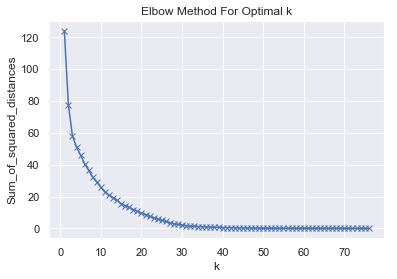

In [240]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### It seems like k=30 would gave us the best result. Let's clustering again with k=30

In [248]:
best_cluster_labels = get_knn_clusters(30,df_grouped_normalized)

# add clustering labels
df_labeled_best = df_sorted.copy()
df_labeled_best.insert(0, 'cluster_labels', best_cluster_labels)
df_labeled_best.head()

[28 20  0 21  0 16  0  0  3  0  8 24 11  8 25  0  0  0 15  0  0  0  0 28
 12 14 26 27 13 23]


,cluster_labels,country_code,1st Most Common Restaurants,2nd Most Common Restaurants,3rd Most Common Restaurants
0,28,AE,Middle Eastern Restaurant,Falafel Restaurant,Moroccan Restaurant
1,20,AR,Argentinian Restaurant,South American Restaurant,Vegetarian / Vegan Restaurant
2,0,AT,Falafel Restaurant,German Restaurant,Greek Restaurant
3,21,AU,Australian Restaurant,Portuguese Restaurant,Falafel Restaurant
4,0,AZ,Moroccan Restaurant,Tea Room,Eastern European Restaurant


In [249]:
df_labeled_best.cluster_labels.value_counts()

0     38
28     5
16     3
8      3
13     2
14     2
23     1
22     1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
27     1
9      1
10     1
11     1
12     1
26     1
25     1
15     1
24     1
17     1
18     1
19     1
20     1
21     1
29     1
Name: cluster_labels, dtype: int64

# Analysis & Result  <a name="result"></a>

### Loading the Country Name and Location Data for Readibility

In [254]:
country_name_code = pd.read_csv('country_name_loc.csv')
country_name_code.rename({'name':'country_name'},axis='columns',inplace=True)
country_name_code = country_name_code[country_name_code.country_code.isin(df.country_code.unique())]
country_name_code = country_name_code.reset_index()
country_name_code = country_name_code.drop(['index'], axis=1)
country_name_code.head(2)

,country_code,latitude,longitude,country_name
0,AE,23.424076,53.847818,United Arab Emirates
1,AR,-38.416097,-63.616672,Argentina


In [255]:
# mapping 2 dataframe to get the full names of each country
df_labeled_best = df_labeled_best.merge(country_name_code, on='country_code', how='inner').dropna()

for i in range(max(best_cluster_labels)+1):
    print('- Cluster No.{} includes the following countries: {}\n'
          .format(i,df_labeled_best[df_labeled_best['cluster_labels']==i]['country_name'].values))
    

- Cluster No.0 includes the following countries: ['Austria' 'Azerbaijan' 'Bulgaria' 'Bahrain' 'Belarus' 'Costa Rica'
 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador'
 'Estonia' 'Hungary' 'Ireland' 'Israel' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Lebanon' 'Sri Lanka' 'Latvia' 'Martinique' 'New Zealand' 'Oman' 'Panama'
 'Poland' 'Puerto Rico' 'Paraguay' 'Qatar' 'Romania' 'El Salvador'
 'Tunisia' 'Trinidad and Tobago' 'Ukraine' 'Uruguay' 'Venezuela' 'Vietnam'
 'South Africa']

- Cluster No.1 includes the following countries: ['United States']

- Cluster No.2 includes the following countries: ['Malaysia']

- Cluster No.3 includes the following countries: ['Brazil']

- Cluster No.4 includes the following countries: ['Turkey']

- Cluster No.5 includes the following countries: ['Japan']

- Cluster No.6 includes the following countries: ['Indonesia']

- Cluster No.7 includes the following countries: ['Mexico']

- Cluster No.8 includes the following countries: ['Canada' 'China' 'Si

In [282]:
df.venue_category.value_counts()

Coffee Shop                        42008
Asian Restaurant                   36657
Chinese Restaurant                 35489
Japanese Restaurant                33892
Pizza Place                        28964
Italian Restaurant                 24940
Diner                              20616
Burger Joint                       20384
American Restaurant                17278
Mexican Restaurant                 16931
Indonesian Restaurant              16829
Seafood Restaurant                 16730
BBQ Joint                          16642
Sandwich Place                     16280
Dessert Shop                       15611
Thai Restaurant                    14595
Breakfast Spot                     13330
Sushi Restaurant                   12476
Snack Place                        11747
Steakhouse                         11716
Malaysian Restaurant               11622
Indian Restaurant                  11442
Korean Restaurant                  10592
Turkish Restaurant                 10581
Fried Chicken Jo

In [283]:
chinese_res_data = df[df['venue_category'].isin([
    'Chinese Restaurant',
    'Dim Sum Restaurant',
    'Dumpling Restaurant'
])]
chinese_res_data.head(2)

,venue_id,latitude,longitude,venue_category,country_code
278,3fd66200f964a5202ef11ee3,37.793747,-122.406099,Dim Sum Restaurant,US
336,3fd66200f964a52037e31ee3,40.714464,-73.999116,Chinese Restaurant,US


In [284]:
chinese_res_data.country_code.value_counts()

MY    7450
JP    5428
ID    5092
US    4851
CN    3580
TH    1667
PH    1190
SG    1107
KR    1073
BR     743
CL     631
CA     581
AU     550
GB     550
MX     542
IN     399
PE     373
RU     346
NL     245
IT     234
ES     198
TR     170
BE     155
CR     132
DE     124
FR      92
AE      82
VN      67
NZ      66
AR      66
CO      64
PR      63
HU      63
UA      56
EC      52
LK      50
SA      48
VE      45
CZ      45
DO      44
KW      41
FI      40
SE      39
TT      36
PY      36
ZA      35
PT      34
AT      32
GH      30
JM      30
PA      30
IE      29
KE      27
SV      26
GR      25
RO      17
LB      15
KZ      15
EG      14
QA      13
BG      13
MQ      12
PL      12
CY      12
CH      11
IL      11
LV      11
OM      10
JO       9
BH       9
DK       9
AZ       4
UY       4
EE       3
TN       3
BY       2
MA       1
Name: country_code, dtype: int64

In [285]:
# create map of Chinese Restaurant around the world
map_chinese = folium.Map(location=[39.7837304, -100.4458825], zoom_start=0)

# add markers to map
for lat, lng, label in zip(chinese_res_data['latitude'], chinese_res_data['longitude'], chinese_res_data['venue_category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radichinese_res=1,
        popup=label,
        color='gray',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=True).add_to(map_chinese)  
map_chinese.save('map_chinese_all.html')

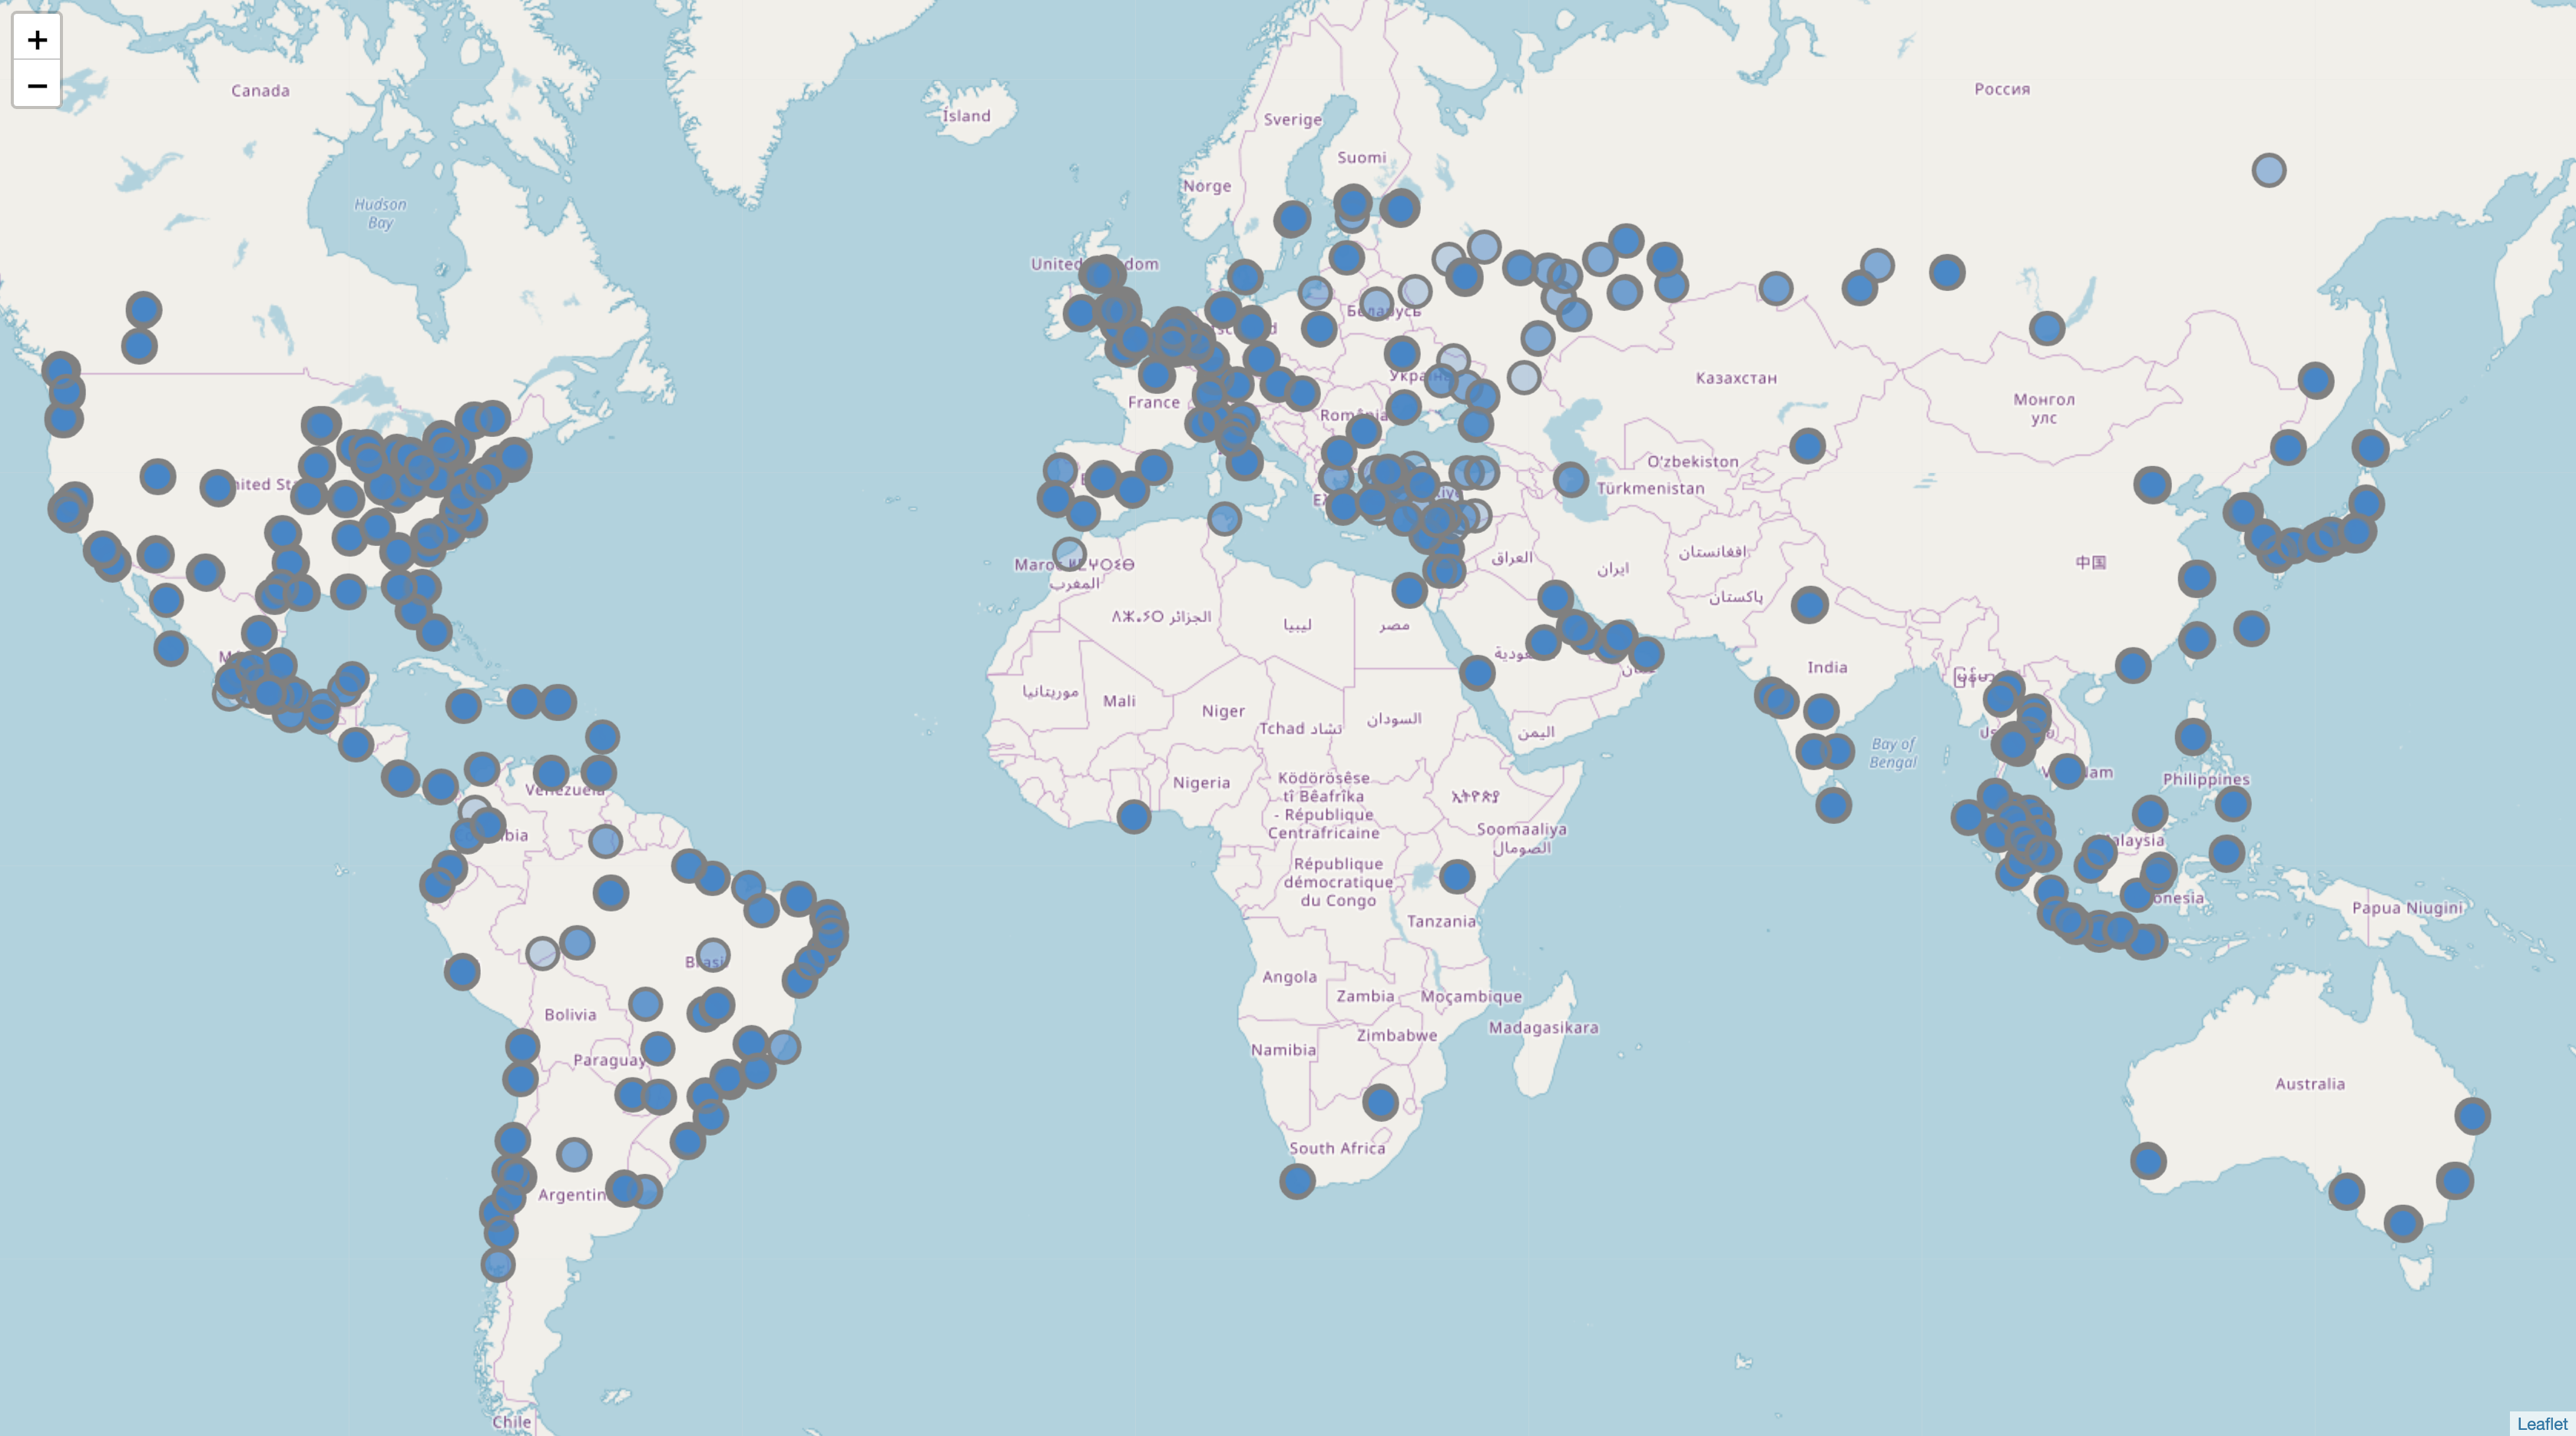

In [286]:
Image(filename='screenshot.png') 

# Discussion <a name="discussion"></a>

**About the clusters:**

As we can see from above, there are about 3 types of clusters. The first type is the Cluster 0, where a good number of countries share a great deal of food venue types in common. The second type is the Cluster 8, 16, and 28, which share similar culutural root. It is more so for No.28 where the countries are all in the Middle East region. The third type is the rest of "stand-along" clusters where each country are distintive enough to make their own clusters. 

**About the chinese restaurants:**

Just like how much people seem to enjoy Asian food all around the world, people nowadays are increasly demand for food that comes from different cultures and nations, which is a strong symbol and result of globalization. However, for example, as we can see. the venue location for Chinese food is mostly in the economically developed areas. Such gap might be the user demographics of foursquare data and can be alleviated by combining different dataset, such as Yelp data as well as webcrawed data of various p2p website. 

# Conclusion <a name="conclusion"></a>

Through this project, I have to admit that many countries have similar types of food categories, and it is kind difficult to extract the specialness of each country simply by calculating the total count of each category. What is hidden is more granular level of food venue category, which is not available from this dataset. For instance, there 34 sub-category of food venue just under Chinese Restaurant according to Foursquare's documentation page. I believe been able to feed the model a more granular food category will give us even better clusters. 

Moreover, as we discussed above, the data points of our dataset are largely gathered around metropolitan areas or economically developed regions, which might or might not reflect the whole picture. For example, China's East Coast has the most GDP and population, so it makes sense to see circles of Chinese Restaurants popping up along the coast. However, to my knowledge, for inland provinces like Sichuan and Chongqing, there are literally thousands of tourists travel every year to these regions for local food. The Chinese version of Yelp (大众点评网) has vast amount of reviews and check-ins for these areas on daily bases. The monthly active users of the website/app is about 70 million people. Therefore, once again, to aggerate a few different datasets and deduplicate might provide us with better coverage.